In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
#city_data = "../MatplotlibHomework/city_data.csv"
#ride_data = "../MatplotlibHomework/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data=pd.read_csv("../MatplotlibHomework/city_data.csv")
city_data

city  driver_count      type
0             Richardfort            38     Urban
1            Williamsstad            59     Urban
2             Port Angela            67     Urban
3              Rodneyfort            34     Urban
4             West Robert            39     Urban
5            West Anthony            70     Urban
6             West Angela            48     Urban
7           Martinezhaven            25     Urban
8               Karenberg            22     Urban
9             Barajasview            26     Urban
10             Robertport            12     Urban
11           Joneschester            39     Urban
12                Leahton            17     Urban
13   West Christopherberg            32     Urban
14                Johnton            27     Urban
15           Reynoldsfurt            67     Urban
16             Port David             7     Urban
17    New Kimberlyborough            33     Urban
18            Carriemouth            52     Urban
19              Rogerston            25     Urban
20               Jerryton            64     Urban
21              Loganberg            23     Urban
22           Simpsonburgh            21     Urban
23             Port Frank            23     Urban
24           South Latoya            10     Urban
25       West Samuelburgh            73     Urban
26            Grahamburgh            61     Urban
27    West Patrickchester            25     Urban
28         North Madeline            19     Urban
29             South Jack            46     Urban
..                    ...           ...       ...
90          Barronchester            11  Suburban
91            Brandonfort            10  Suburban
92        East Danielview            22  Suburban
93         East Marymouth             5  Suburban
94            Mezachester            14  Suburban
95              Lewisland             4  Suburban
96             Josephside            25  Suburban
97              Davidfurt            23  Suburban
98          Nicolechester            19  Suburban
99         East Aaronbury             7  Suburban
100    North Richardhaven             1  Suburban
101         North Jeffrey            11  Suburban
102        South Jennifer             7     Rural
103          West Heather             4     Rural
104            Newtonview             1     Rural
105           North Holly             8     Rural
106           Michaelberg             6     Rural
107           Taylorhaven             1     Rural
108           Penaborough             6     Rural
109        Harringtonfort             4     Rural
110            Lake Jamie             4     Rural
111       Lake Latoyabury             2     Rural
112           North Jaime             1     Rural
113     South Marychester             1     Rural
114             Garzaport             7     Rural
115          Bradshawfurt             7     Rural
116          New Ryantown             2     Rural
117        Randallchester             9     Rural
118           Jessicaport             1     Rural
119       South Saramouth             7     Rural

[120 rows x 3 columns]

In [3]:
# Read the City and Ride Data
ride_data=pd.read_csv("../MatplotlibHomework/ride_data.csv")
ride_data.describe()

fare       ride_id
count  2375.000000  2.375000e+03
mean     26.753112  4.887270e+12
std      12.109465  2.907361e+12
min       4.050000  3.218337e+08
25%      17.190000  2.381175e+12
50%      26.600000  4.748541e+12
75%      36.645000  7.461936e+12
max      58.550000  9.991538e+12

In [4]:
# Combine the data into a single dataset
combined_ride=pd.merge(city_data,ride_data, how="outer",on="city")

# Display the data table for preview

combined_ride.head()
#combined_ride.to_csv("combined_ride.csv")

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

## Bubble Plot of Ride Sharing Data

In [5]:
# Obtain the x and y coordinates for each of the three city types x=total number of rides and y=avg fare


# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [6]:
# sort by type
urban_city=combined_ride.loc[(combined_ride["type"]=="Urban")]
suburban_city=combined_ride.loc[(combined_ride["type"]=="Suburban")]

rural_city=combined_ride.loc[(combined_ride["type"]=="Rural")]
rural_city.head(2)

city  driver_count   type                 date   fare  \
2250  South Jennifer             7  Rural  2018-04-01 09:32:45  21.63   
2251  South Jennifer             7  Rural  2018-03-07 19:10:13  48.79   

            ride_id  
2250  9135979586871  
2251  9730627367446

In [7]:
#x=total number of rides and y=avg fare, total driver count/city =size (whey totaldrive_urban has an extra column)
totalrides_urban=urban_city.groupby(["city"]).count()["ride_id"]
avgfare_urban=urban_city.groupby(["city"])["fare"].mean()
totaldrivers_urban=urban_city.groupby("city")["driver_count"].mean()

totalrides_suburban=suburban_city.groupby(["city"]).count()["ride_id"]
avgfare_suburban=suburban_city.groupby(["city"])["fare"].mean()
totaldrivers_suburban=suburban_city.groupby("city")["driver_count"].mean()

totalrides_rural=rural_city.groupby(["city"]).count()["ride_id"]
avgfare_rural=rural_city.groupby(["city"])["fare"].mean()
totaldrivers_rural=rural_city.groupby("city")["driver_count"].mean()


In [8]:
#totaldrivers_suburban=suburban_city.groupby("city")["driver_count"].value_counts()
#totaldrivers_suburban

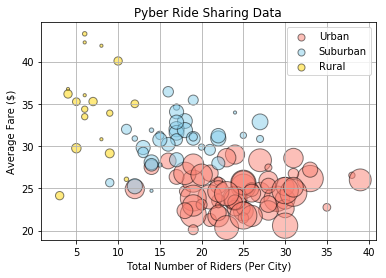

In [9]:
# Build the scatter plots for each city types
plt.scatter(totalrides_urban, avgfare_urban, s=totaldrivers_urban*10, marker="o",
             facecolors="salmon", edgecolors="black", alpha=0.5, label="Urban")
plt.scatter(totalrides_suburban, avgfare_suburban, s=totaldrivers_suburban*10, marker="o",
            facecolor="skyblue", edgecolors="black", alpha=0.5, label="Suburban")
plt.scatter(totalrides_rural, avgfare_rural, s=totaldrivers_rural*10, marker="o", 
           facecolors="gold", edgecolors="black",alpha=0.5, label="Rural")

plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")
plt.grid()
#plt.legend(loc="best")
legend=plt.legend(loc="best")
legend.legendHandles
for bubble_size in legend.legendHandles:
    bubble_size.set_sizes([50])

In [10]:
# Show plot
plt.show()
plt.savefig("../MatplotlibHomework/PyberRideSharinng.png")        

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [11]:
# Calculate Type Percents

total_fare=combined_ride.groupby(["type"])["fare"].sum()
total_fare




# Save Figure


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

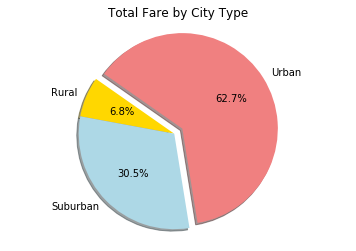

In [28]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightblue","lightcoral"]
explode =[0, 0, 0.1]
plt.title("Total Fare by City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)

plt.axis("equal")
plt.savefig("../MatplotlibHomework/bubblesplot.png")  

In [29]:
# Show Figure
plt.show()

## Total Rides by City Type

In [15]:
# Calculate Ride Percents

total_rides=combined_ride.groupby(["type"])["ride_id"].count()
#total_ride=duplicate_cities.groupby(["type"])["ride_id"].sum()
# Build Pie Chart
#total_ride
# Save Figure
#duplicate_cities.to_csv("duplicate_cities.csv")


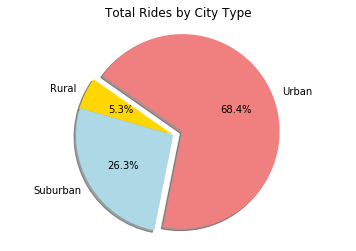

In [26]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightblue","lightcoral"]
explode =[0, 0, 0.1]
plt.title("Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.axis("equal")
plt.savefig("../MatplotlibHomework/RidesByCityType.png")  

In [25]:
# Show Figure

plt.show()


<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [18]:
# Calculate Driver Percents
duplicate_cities = combined_ride.drop_duplicates('city')
total_drivers=duplicate_cities.groupby(["type"])["driver_count"].sum()
total_drivers


# Save Figure


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

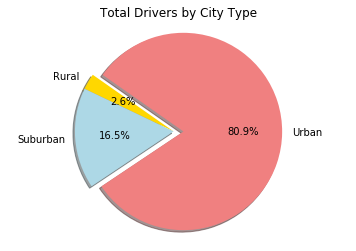

In [21]:
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightblue","lightcoral"]
explode =[0, 0, 0.1]
plt.title("Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.axis("equal")
plt.savefig("../MatplotlibHomework/DriversByCityType.png") 

In [20]:
# Show Figure
plt.show()